In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
ath_df = pd.read_csv("athlete_events.csv")
noc_df = pd.read_csv("noc_regions.csv")

In [3]:
ath_df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

In [4]:
noc_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [5]:
ath_df['Team'].unique

<bound method Series.unique of 0                  China
1                  China
2                Denmark
3         Denmark/Sweden
4            Netherlands
               ...      
271111          Poland-1
271112            Poland
271113            Poland
271114            Poland
271115            Poland
Name: Team, Length: 271116, dtype: object>

In [6]:
ath_df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [7]:
ath_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
ath_df.duplicated().sum()

1385

In [9]:
ath_df = ath_df.drop_duplicates()

In [10]:
ath_df.duplicated().sum()

0

In [11]:
medal_dummies = pd.get_dummies(ath_df['Medal']).astype(int)

In [12]:
ath_df = pd.concat([ath_df,medal_dummies],axis=1)

In [13]:
ath_df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  Bronze  \
0          Basketball               Basketball Men's Basketball   NaN       0   
1                Judo              Judo Men's Extra-Lightweight   NaN       0   
2            Football                   Football Men's Football   NaN       0   
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold       0   
4       Speed Skating          Speed Skating Women's 500 metres   NaN       0   
...               ...                                       ...   ...     ...   
271111           Luge                Luge Mixed (Men)'s Doubles   NaN       0   
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN       0   
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN       0   
271114      Bobsleigh                      Bobsleigh Men's Four   NaN       0   
271115      Bobsleigh                      Bobsleigh Men's Four   NaN       0   

        Gold  Silver  
0          0       0  
1          0       0  
2          0       0  
3          1       0  
4          0       0  
...      ...     ...  
271111     0       0  
271112     0       0  
271113     0       0  
271114     0       0  
271115     0       0  

[269731 rows x 18 columns]

In [14]:
ath_df['Games'].unique() #since we already have seperate columns with year and season we don't need games column

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [15]:
ath_df = ath_df.drop(['Games'],axis=1)

In [16]:
ath_df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC  Year  Season            City          Sport  \
0                China  CHN  1992  Summer       Barcelona     Basketball   
1                China  CHN  2012  Summer          London           Judo   
2              Denmark  DEN  1920  Summer       Antwerpen       Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris     Tug-Of-War   
4          Netherlands  NED  1988  Winter         Calgary  Speed Skating   
...                ...  ...   ...     ...             ...            ...   
271111        Poland-1  POL  1976  Winter       Innsbruck           Luge   
271112          Poland  POL  2014  Winter           Sochi    Ski Jumping   
271113          Poland  POL  2014  Winter           Sochi    Ski Jumping   
271114          Poland  POL  1998  Winter          Nagano      Bobsleigh   
271115          Poland  POL  2002  Winter  Salt Lake City      Bobsleigh   

                                           Event Medal  Bronze  Gold  Silver  
0                    Basketball Men's Basketball   NaN       0     0       0  
1                   Judo Men's Extra-Lightweight   NaN       0     0       0  
2                        Football Men's Football   NaN       0     0       0  
3                    Tug-Of-War Men's Tug-Of-War  Gold       0     1       0  
4               Speed Skating Women's 500 metres   NaN       0     0       0  
...                                          ...   ...     ...   ...     ...  
271111                Luge Mixed (Men)'s Doubles   NaN       0     0       0  
271112  Ski Jumping Men's Large Hill, Individual   NaN       0     0       0  
271113        Ski Jumping Men's Large Hill, Team   NaN       0     0       0  
271114                      Bobsleigh Men's Four   NaN       0     0       0  
271115                      Bobsleigh Men's Four   NaN       0     0       0  

[269731 rows x 17 columns]

In [17]:
noc_df

NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]

In [18]:
noc_df.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [19]:
ath_df = pd.merge(ath_df,noc_df[['NOC','region']],on='NOC',how='left')

In [20]:
ath_df = ath_df[ath_df['Season'] == 'Summer']

In [21]:
ath_df['City'].value_counts()

City
London            22297
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Beijing           13602
Barcelona         12977
Seoul             12037
Los Angeles       11919
Munich            10304
Montreal           8641
Mexico City        8588
Helsinki           8270
Roma               8119
Tokyo              7702
Moskva             7191
Paris              7008
Berlin             6251
Melbourne          4829
Amsterdam          4656
Stockholm          4338
Antwerpen          4292
St. Louis          1301
Name: count, dtype: int64

In [22]:
ath_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
269721  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
269722  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
269723  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
269724  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
269725  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC  Year  Season            City       Sport  \
0                China  CHN  1992  Summer       Barcelona  Basketball   
1                China  CHN  2012  Summer          London        Judo   
2              Denmark  DEN  1920  Summer       Antwerpen    Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris  Tug-Of-War   
26         Netherlands  NED  1932  Summer     Los Angeles   Athletics   
...                ...  ...   ...     ...             ...         ...   
269721       Argentina  ARG  2004  Summer          Athina      Hockey   
269722   United States  USA  1972  Summer          Munich    Football   
269723          Russia  RUS  2000  Summer          Sydney      Rowing   
269724          Russia  RUS  2004  Summer          Athina      Rowing   
269725         Belarus  BLR  2016  Summer  Rio de Janeiro  Basketball   

                                         Event Medal  Bronze  Gold  Silver  \
0                  Basketball Men's Basketball   NaN       0     0       0   
1                 Judo Men's Extra-Lightweight   NaN       0     0       0   
2                      Football Men's Football   NaN       0     0       0   
3                  Tug-Of-War Men's Tug-Of-War  Gold       0     1       0   
26                Athletics Women's 100 metres   NaN       0     0       0   
...                                        ...   ...     ...   ...     ...   
269721                     Hockey Men's Hockey   NaN       0     0       0   
269722                 Football Men's Football   NaN       0     0       0   
269723  Rowing Men's Lightweight Coxless Fours   NaN       0     0       0   
269724  Rowing Men's Lightweight Coxless Fours   NaN       0     0       0   
269725           Basketball Women's Basketball   NaN       0     0       0   

             region  
0             China  
1             China  
2           Denmark  
3           Denmark  
26      Netherlands  
...             ...  
269721    Argentina  
269722          USA  
269723       Russia  
269724       Russia  
269725      Belarus  

[221167 rows x 18 columns]

In [23]:
ath_df['Year'].value_counts()

Year
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
1992    12977
2012    12920
1988    12037
1972    10304
1984     9454
1976     8641
1968     8588
1952     8270
1960     8119
1964     7702
1980     7191
1948     6308
1936     6251
1956     5127
1924     5110
1928     4656
1920     4292
1912     4040
1908     3069
1932     2465
1900     1898
1906     1733
1904     1301
1896      380
Name: count, dtype: int64

In [24]:
medal_tally = ath_df.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()

In [25]:
medal_tally.head(30)

region  Gold  Silver  Bronze
0              USA  2472    1333    1197
1           Russia  1220     974     994
2          Germany  1075     987    1064
3               UK   635     729     620
4            Italy   518     474     454
5           France   463     567     587
6          Hungary   432     328     363
7        Australia   362     456     515
8           Sweden   354     396     358
9            China   335     319     259
10     Netherlands   245     302     371
11           Japan   230     287     333
12          Norway   227     196     167
13         Denmark   179     236     177
14     South Korea   171     206     175
15            Cuba   164     129     116
16         Romania   161     200     290
17          Canada   158     239     344
18          Serbia   157     216     159
19         Finland   132     125     217
20           India   131      19      40
21          Poland   111     185     242
22           Spain   109     243     135
23          Brazil   109     175     191
24     Switzerland    99     178     139
25         Belgium    96     193     166
26  Czech Republic    94     169     150
27       Argentina    91      92      91
28     New Zealand    90      55      82
29          Greece    62     109      84

In [26]:
ath_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze', 'Gold', 'Silver',
       'region'],
      dtype='object')

In [27]:
new_medal_tally = ath_df.drop_duplicates(subset=['Sex', 'Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal']).groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()

In [28]:
new_medal_tally

region  Gold  Silver  Bronze
0              USA  1043     810     716
1           Russia   594     499     487
2          Germany   455     459     494
3               UK   285     328     305
4           France   238     258     288
..             ...   ...     ...     ...
200        Lesotho     0       0       0
201        Albania     0       0       0
202          Libya     0       0       0
203  Liechtenstein     0       0       0
204        Liberia     0       0       0

[205 rows x 4 columns]

In [29]:
new_medal_tally['Total_medals'] = new_medal_tally['Gold'] + new_medal_tally['Silver'] + new_medal_tally['Bronze']

In [30]:
new_medal_tally[new_medal_tally['region'] == 'India']

region  Gold  Silver  Bronze  Total_medals
47  India     9       7      12            28

In [31]:
new_medal_tally

region  Gold  Silver  Bronze  Total_medals
0              USA  1043     810     716          2569
1           Russia   594     499     487          1580
2          Germany   455     459     494          1408
3               UK   285     328     305           918
4           France   238     258     288           784
..             ...   ...     ...     ...           ...
200        Lesotho     0       0       0             0
201        Albania     0       0       0             0
202          Libya     0       0       0             0
203  Liechtenstein     0       0       0             0
204        Liberia     0       0       0             0

[205 rows x 5 columns]

In [32]:
#finding list of countries that participated and the years when the olympics were played
def list_of_country_year(ath_df):
    year = np.sort(ath_df['Year'].unique())
    year = year.tolist()
    year.insert(0,'Overall')
    year.insert(0,'Select')
    
    country = np.sort(ath_df['region'].dropna().unique())
    country = country.tolist()
    country.insert(0,'Overall')
    country.insert(0,'Select')
    
    return year,country

In [33]:
year, country = list_of_country_year(ath_df)

In [34]:
year

['Select',
 'Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [35]:
country

['Select',
 'Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatem

In [36]:
medal_df = ath_df.drop_duplicates(subset=['Sex', 'Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [37]:
medal_df[(medal_df['Year']==1992) & (medal_df['region']=='India')]

ID                             Name Sex   Age  Height  Weight  \
899        512  Shiny Kurisingal Abraham-Wilson   F  27.0   167.0    53.0   
1709       952              Badathala Adisekhar   M  28.0     NaN    53.0   
2512      1415                    Shakeel Ahmed   M  21.0     NaN     NaN   
11872     6481         Chetan Panduranga Baboor   M  18.0   188.0    70.0   
21126    11202           Deepankar Bhattacharya   M  20.0   178.0    68.0   
21127    11202           Deepankar Bhattacharya   M  20.0   178.0    68.0   
21723    11521         Cawas Kersasp Billimoria   M  29.0     NaN     NaN   
22299    11796                  Madhumita Bisht   F  27.0     NaN     NaN   
22351    11824             Narendar Bisth Singh   M  28.0     NaN     NaN   
32895    17020                    Sandeep Byala   M  24.0     NaN     NaN   
33902    17542                       Cyrus Cama   M  20.0     NaN     NaN   
48527    25130                  Dhulchand Damor   M  27.0     NaN     NaN   
48528    25130                  Dhulchand Damor   M  27.0     NaN     NaN   
54377    28043                     Abha Dhillan   F  38.0     NaN     NaN   
60025    30914                       Soma Dutta   F  24.0   160.0    46.0   
60026    30914                       Soma Dutta   F  24.0   160.0    46.0   
78440    40046         Sujay Jashiwant Ghorpade   M  27.0     NaN     NaN   
80637    41179             Sandeep Gollen Kumar   M  20.0     NaN     NaN   
104672   53272                      Pappu Jadav   M  18.0     NaN     NaN   
126390   64064                  Ramesh Krishnan   M  31.0   170.0    63.0   
126391   64064                  Ramesh Krishnan   M  31.0   170.0    63.0   
128208   64883                       Anil Kumar   M  20.0     NaN     NaN   
128210   64885                      Ashok Kumar   M  23.0     NaN     NaN   
128250   64913           Rajinder Kumar Dhanger   M  30.0     NaN     NaN   
154871   78207                    Sangita Mehta   F  25.0     NaN     NaN   
166176   83970        Sivaraj Naalamuthu Pillai   M  24.0     NaN    59.0   
182105   92040                      M. R. Patil   M  24.0     NaN     NaN   
191656   96747             Bahadur Prasad Singh   M  26.0   177.0    63.0   
191666   96753                  Rajendra Prasad   M  20.0     NaN     NaN   
195828   98854            Ponnuswamy Rangaswamy   M  27.0     NaN    56.0   
204171  103068                  Niyati Roy-Shah   F  26.0     NaN     NaN   
219974  111114             Narinder Singh Kodan   M  23.0     NaN     NaN   
220100  111183              Dharan Singh Dahiya   M  25.0     NaN     NaN   
250066  125856             Devarajan Venkatesan   M  19.0   176.0    54.0   
250448  126059                    Subhash Verma   M  24.0   180.0    90.0   
262732  132140                 Dharmendra Yadav   M  19.0   162.0    51.0   

         Team  NOC  Year  Season       City          Sport  \
899     India  IND  1992  Summer  Barcelona      Athletics   
1709    India  IND  1992  Summer  Barcelona  Weightlifting   
2512    India  IND  1992  Summer  Barcelona         Hockey   
11872   India  IND  1992  Summer  Barcelona   Table Tennis   
21126   India  IND  1992  Summer  Barcelona      Badminton   
21127   India  IND  1992  Summer  Barcelona      Badminton   
21723   India  IND  1992  Summer  Barcelona           Judo   
22299   India  IND  1992  Summer  Barcelona      Badminton   
22351   India  IND  1992  Summer  Barcelona         Boxing   
32895   India  IND  1992  Summer  Barcelona           Judo   
33902   India  IND  1992  Summer  Barcelona        Sailing   
48527   India  IND  1992  Summer  Barcelona        Archery   
48528   India  IND  1992  Summer  Barcelona        Archery   
54377   India  IND  1992  Summer  Barcelona       Shooting   
60025   India  IND  1992  Summer  Barcelona       Shooting   
60026   India  IND  1992  Summer  Barcelona       Shooting   
78440   India  IND  1992  Summer  Barcelona   Table Tennis   
80637   India  IND  1992  Summer  Barcelona   

In [38]:
def fetch_tally(s_year,s_country):
    if ((s_year=='Overall') & (s_country=='Overall')):
        fetched_tally = medal_df
    
    elif (s_year=='Overall'):
        fetched_tally = medal_df[(medal_df['region']==s_country)]
        
    elif (s_country=='Overall'):
        fetched_tally = medal_df[(medal_df['Year']==s_year)]
        
    else:
        fetched_tally = medal_df[(medal_df['Year']==s_year) & (medal_df['region']==s_country)]
        
    if((s_year=='Overall') & (s_country!='Overall')):
        per_year_tally = fetched_tally.groupby('Year')[['Gold','Silver','Bronze']].sum().sort_values('Year').reset_index()
        print(per_year_tally)
        print('\n Total Tally:')
    fetch_tally = fetched_tally.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()
        
    fetch_tally['Total'] = fetch_tally['Gold'] + fetch_tally['Silver'] + fetch_tally['Bronze']
    
    return fetch_tally

In [39]:
fetch_tally('Overall','Overall')

region  Gold  Silver  Bronze  Total
0              USA  1043     810     716   2569
1           Russia   594     499     487   1580
2          Germany   455     459     494   1408
3               UK   285     328     305    918
4           France   238     258     288    784
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [40]:
fetch_tally(2012,'Overall')

region  Gold  Silver  Bronze  Total
0                            USA    46      28      30    104
1                          China    39      28      24     91
2                             UK    30      19      19     68
3                         Russia    24      26      32     82
4                    South Korea    13       8       7     28
..                           ...   ...     ...     ...    ...
197                        India     0       2       4      6
198  Individual Olympic Athletes     0       0       0      0
199                    Indonesia     0       1       1      2
200                         Iraq     0       0       0      0
201                     Zimbabwe     0       0       0      0

[202 rows x 5 columns]

In [41]:
fetch_tally('Overall','India')

    Year  Gold  Silver  Bronze
0   1900     0       2       0
1   1920     0       0       0
2   1924     0       0       0
3   1928     1       0       0
4   1932     1       0       0
5   1936     1       0       0
6   1948     1       0       0
7   1952     1       0       1
8   1956     1       0       0
9   1960     0       1       0
10  1964     1       0       0
11  1968     0       0       1
12  1972     0       0       1
13  1976     0       0       0
14  1980     1       0       0
15  1984     0       0       0
16  1988     0       0       0
17  1992     0       0       0
18  1996     0       0       1
19  2000     0       0       1
20  2004     0       1       0
21  2008     1       0       2
22  2012     0       2       4
23  2016     0       1       1

 Total Tally:


region  Gold  Silver  Bronze  Total
0  India     9       7      12     28

In [42]:
fetch_tally(1900,'India')

region  Gold  Silver  Bronze  Total
0  India     0       2       0      2

# Overall Olympic Data Analysis

In [43]:
ath_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
269721  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
269722  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
269723  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
269724  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
269725  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC  Year  Season            City       Sport  \
0                China  CHN  1992  Summer       Barcelona  Basketball   
1                China  CHN  2012  Summer          London        Judo   
2              Denmark  DEN  1920  Summer       Antwerpen    Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris  Tug-Of-War   
26         Netherlands  NED  1932  Summer     Los Angeles   Athletics   
...                ...  ...   ...     ...             ...         ...   
269721       Argentina  ARG  2004  Summer          Athina      Hockey   
269722   United States  USA  1972  Summer          Munich    Football   
269723          Russia  RUS  2000  Summer          Sydney      Rowing   
269724          Russia  RUS  2004  Summer          Athina      Rowing   
269725         Belarus  BLR  2016  Summer  Rio de Janeiro  Basketball   

                                         Event Medal  Bronze  Gold  Silver  \
0                  Basketball Men's Basketball   NaN       0     0       0   
1                 Judo Men's Extra-Lightweight   NaN       0     0       0   
2                      Football Men's Football   NaN       0     0       0   
3                  Tug-Of-War Men's Tug-Of-War  Gold       0     1       0   
26                Athletics Women's 100 metres   NaN       0     0       0   
...                                        ...   ...     ...   ...     ...   
269721                     Hockey Men's Hockey   NaN       0     0       0   
269722                 Football Men's Football   NaN       0     0       0   
269723  Rowing Men's Lightweight Coxless Fours   NaN       0     0       0   
269724  Rowing Men's Lightweight Coxless Fours   NaN       0     0       0   
269725           Basketball Women's Basketball   NaN       0     0       0   

             region  
0             China  
1             China  
2           Denmark  
3           Denmark  
26      Netherlands  
...             ...  
269721    Argentina  
269722          USA  
269723       Russia  
269724       Russia  
269725      Belarus  

[221167 rows x 18 columns]

In [44]:
ath_df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [45]:
ath_df['City'].unique().shape[0]  #no.of cities where olympics were held

23

In [46]:
ath_df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [47]:
ath_df['Sport'].unique().shape[0]     #no. of sports played at the olympics

52

In [48]:
ath_df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [49]:
ath_df['region'].unique().shape[0]         #estimate no.of participating nations

206

In [50]:
ath_df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [51]:
ath_df['Event'].unique().shape[0]      #number of events

651

In [52]:

ath_df['Name'].unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
       'Olga Igorevna Zyuzkova'], dtype=object)

In [53]:
ath_df['Name'].unique().shape[0]       #no. of atheletes

116122

# Graphs

In [54]:
nation_df = pd.DataFrame(ath_df.drop_duplicates(subset=['Year','region'])['Year'].value_counts()).sort_values('Year').reset_index()    #no. of nations in different years

In [55]:
nation_df.rename(columns={'count':'nations'},inplace=True)

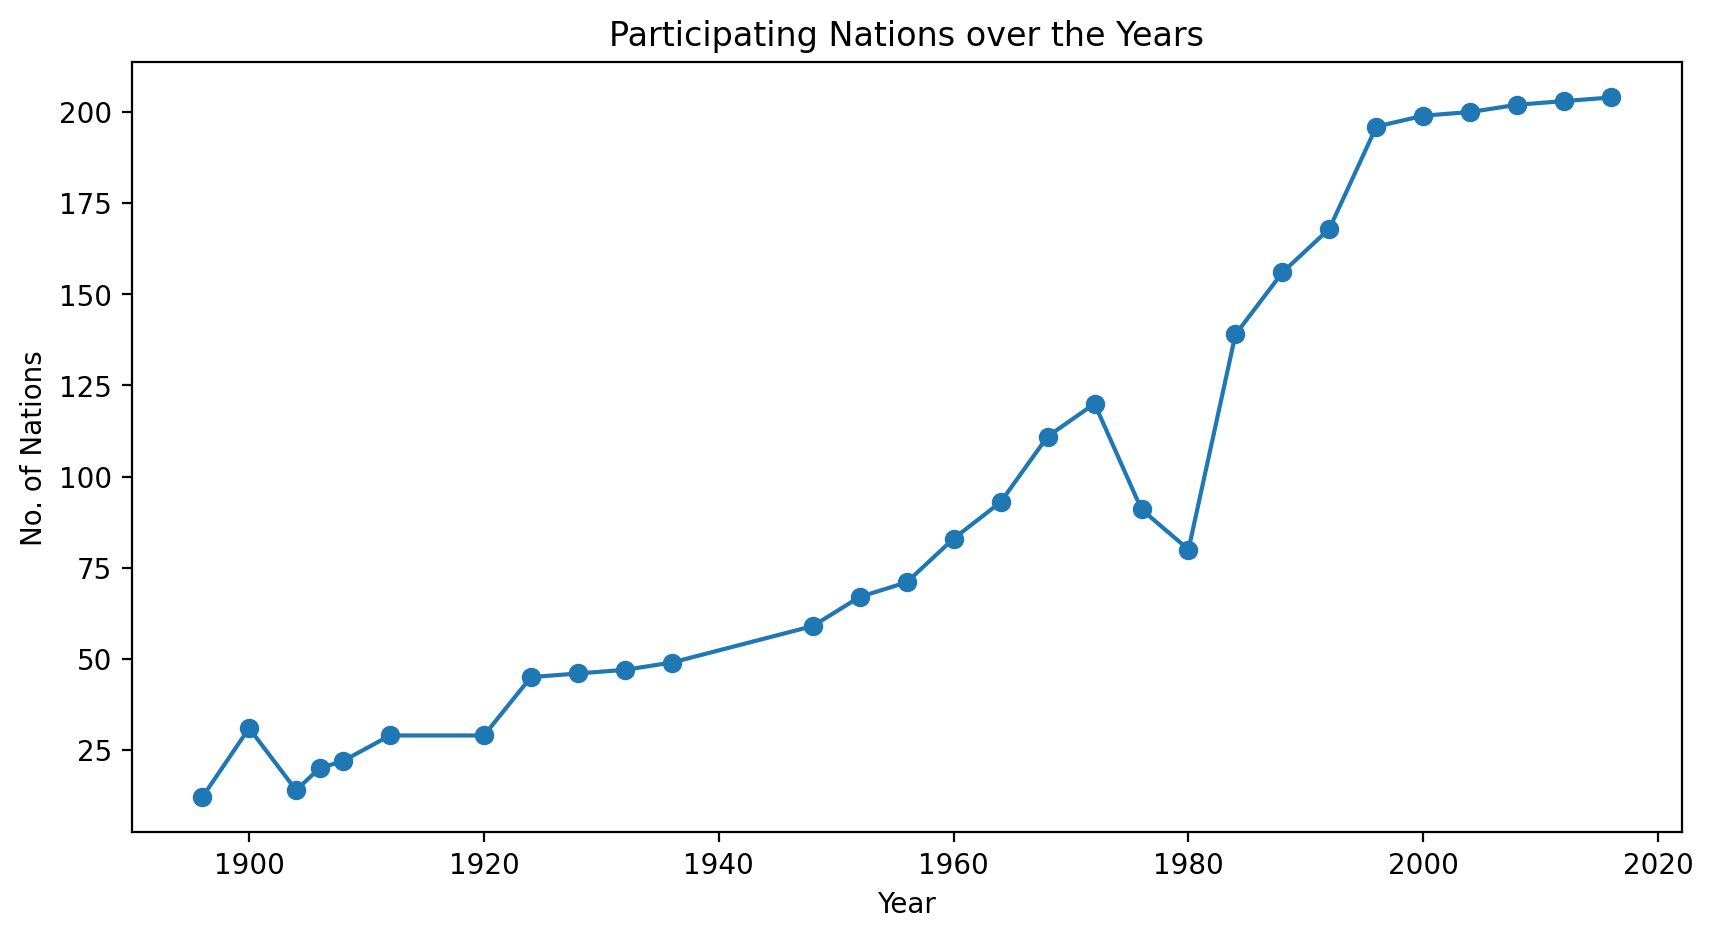

In [56]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(nation_df['Year'],nation_df['nations'],marker='o')
plt.title('Participating Nations over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Nations')
plt.show()

In [57]:
event_df = pd.DataFrame(ath_df.drop_duplicates(subset=['Year','Event'])['Year'].value_counts()).sort_values('Year').reset_index()    #no. of events over years

In [58]:
event_df.rename(columns={'count':'events'},inplace=True)

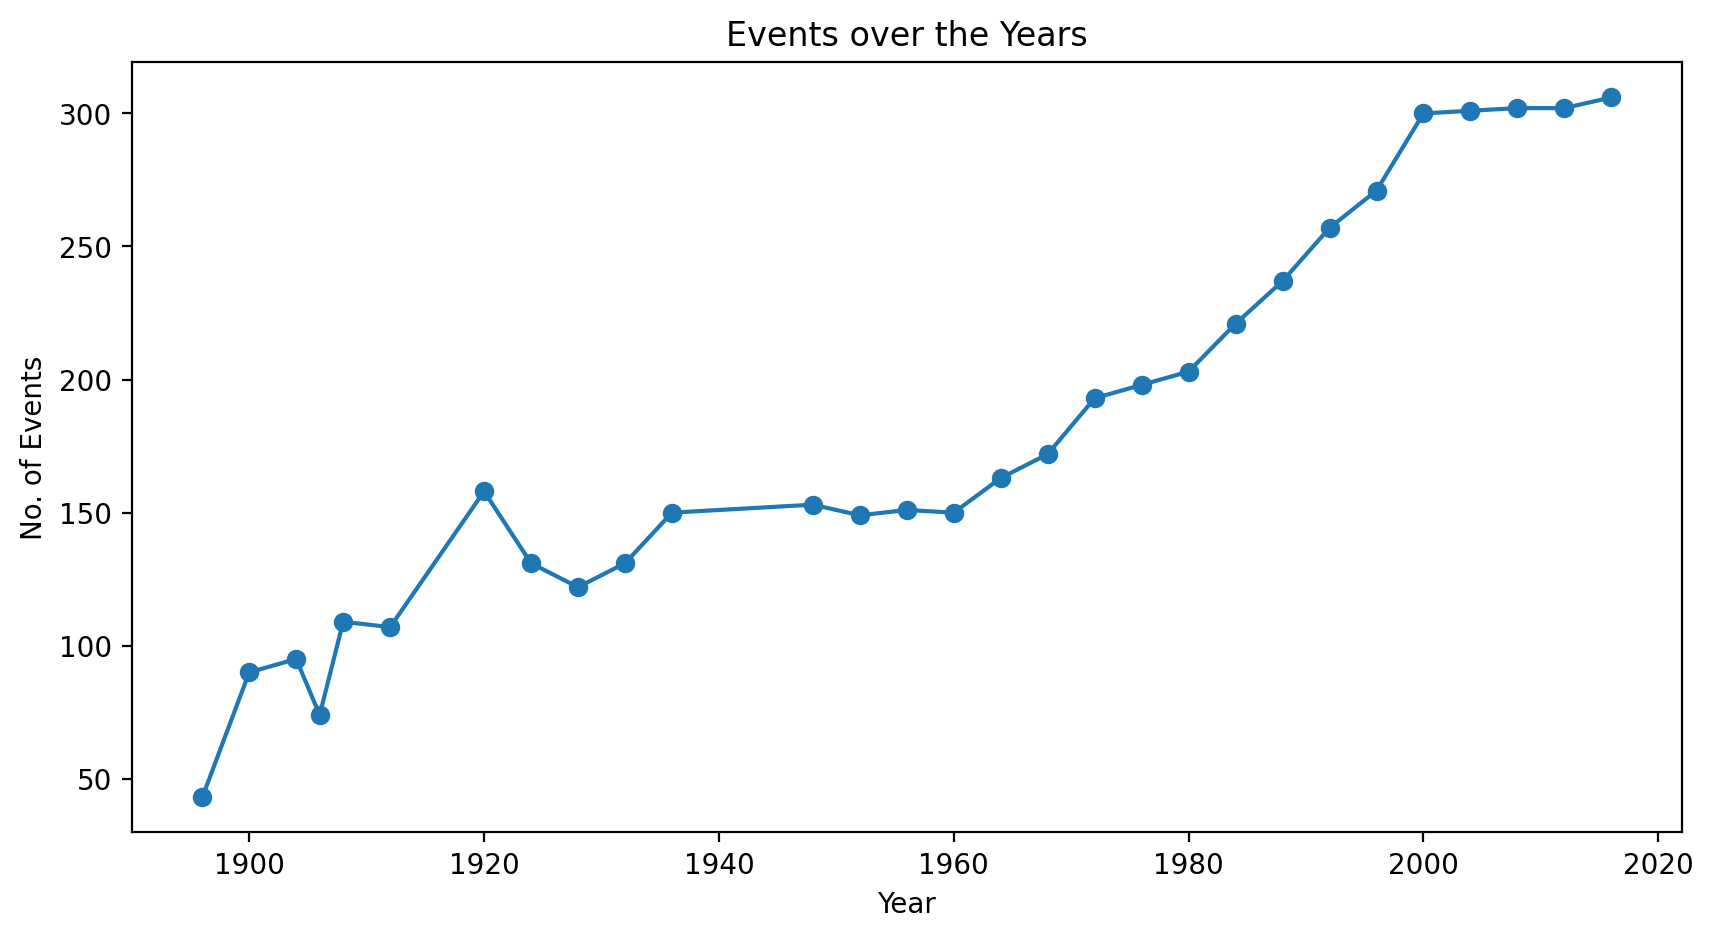

In [59]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(event_df['Year'],event_df['events'],marker='o')
plt.title('Events over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Events')
plt.show()

In [60]:
atheletes_df = pd.DataFrame(ath_df.drop_duplicates(subset=['Year','Name'])['Year'].value_counts()).sort_values('Year').reset_index()    #no. of atheletes in different years

In [61]:
atheletes_df.rename(columns={'count':'atheletes'},inplace=True)

In [62]:
atheletes_df

Year  atheletes
0   1896        176
1   1900       1220
2   1904        650
3   1906        841
4   1908       2024
5   1912       2409
6   1920       2675
7   1924       3256
8   1928       3246
9   1932       1922
10  1936       4482
11  1948       4402
12  1952       4931
13  1956       3346
14  1960       5348
15  1964       5134
16  1968       5552
17  1972       7105
18  1976       6070
19  1980       5252
20  1984       6791
21  1988       8443
22  1992       9380
23  1996      10324
24  2000      10639
25  2004      10537
26  2008      10880
27  2012      10502
28  2016      11174

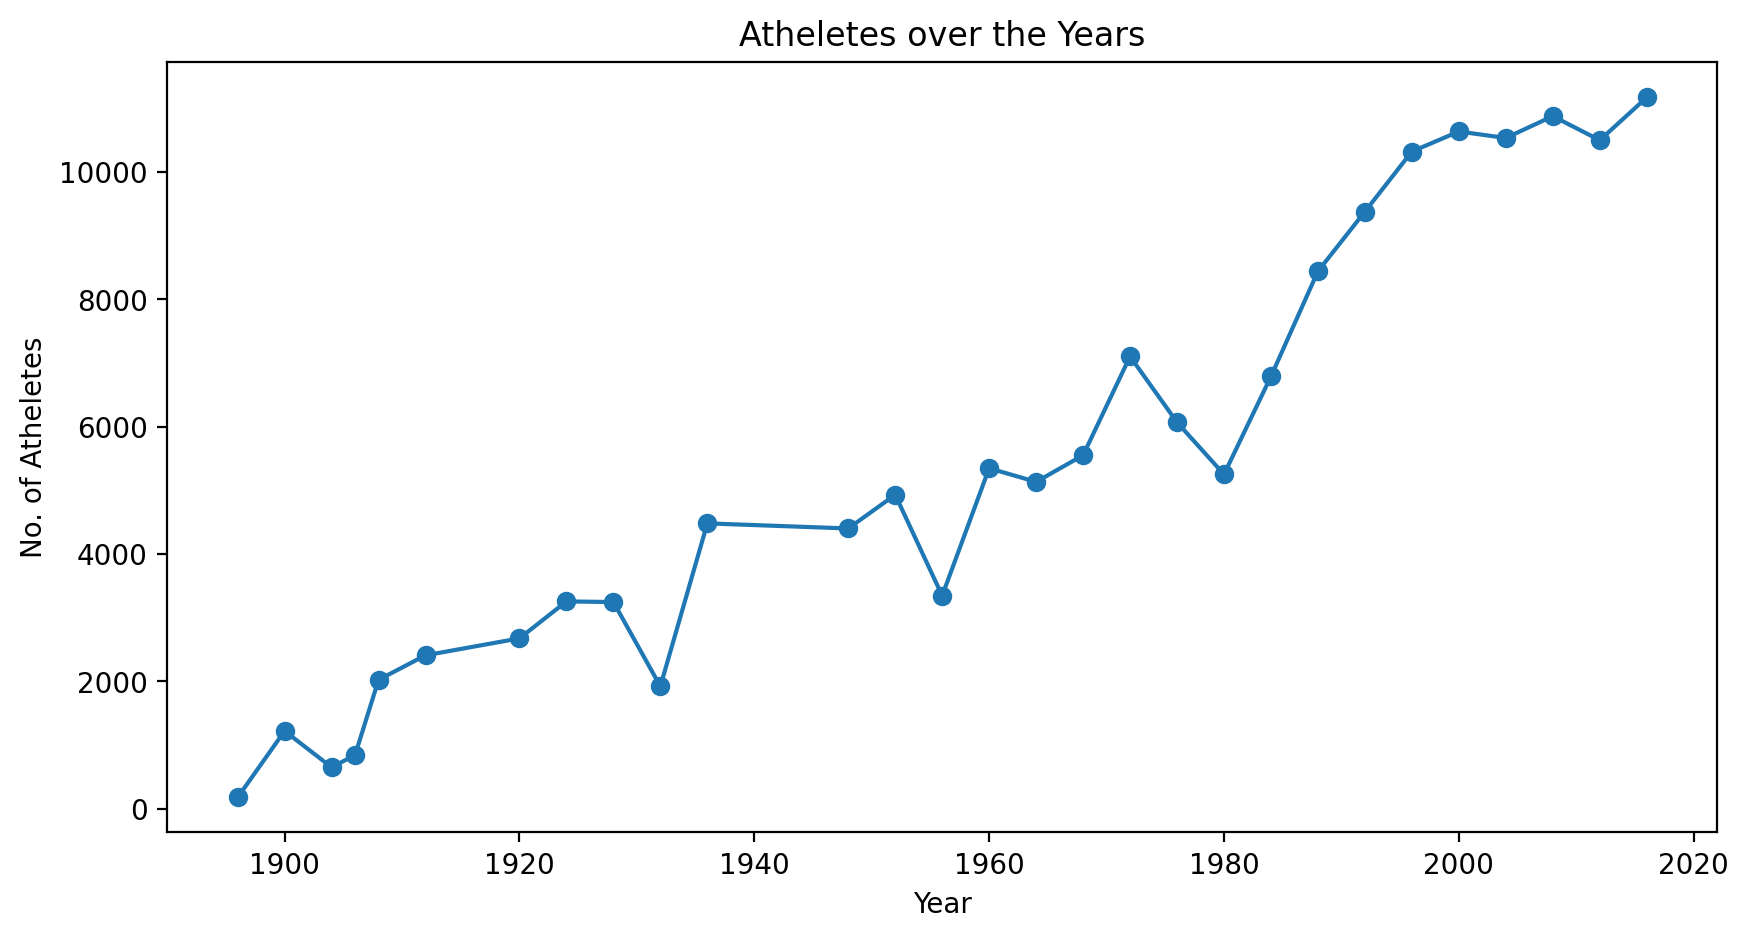

In [63]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(atheletes_df['Year'],atheletes_df['atheletes'],marker='o')
plt.title('Atheletes over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Atheletes')
plt.show()

In [64]:
ath_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
269721  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
269722  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
269723  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
269724  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
269725  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC  Year  Season            City       Sport  \
0                China  CHN  1992  Summer       Barcelona  Basketball   
1                China  CHN  2012  Summer          London        Judo   
2              Denmark  DEN  1920  Summer       Antwerpen    Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris  Tug-Of-War   
26         Netherlands  NED  1932  Summer     Los Angeles   Athletics   
...                ...  ...   ...     ...             ...         ...   
269721       Argentina  ARG  2004  Summer          Athina      Hockey   
269722   United States  USA  1972  Summer          Munich    Football   
269723          Russia  RUS  2000  Summer          Sydney      Rowing   
269724          Russia  RUS  2004  Summer          Athina      Rowing   
269725         Belarus  BLR  2016  Summer  Rio de Janeiro  Basketball   

                                         Event Medal  Bronze  Gold  Silver  \
0                  Basketball Men's Basketball   NaN       0     0       0   
1                 Judo Men's Extra-Lightweight   NaN       0     0       0   
2                      Football Men's Football   NaN       0     0       0   
3                  Tug-Of-War Men's Tug-Of-War  Gold       0     1       0   
26                Athletics Women's 100 metres   NaN       0     0       0   
...                                        ...   ...     ...   ...     ...   
269721                     Hockey Men's Hockey   NaN       0     0       0   
269722                 Football Men's Football   NaN       0     0       0   
269723  Rowing Men's Lightweight Coxless Fours   NaN       0     0       0   
269724  Rowing Men's Lightweight Coxless Fours   NaN       0     0       0   
269725           Basketball Women's Basketball   NaN       0     0       0   

             region  
0             China  
1             China  
2           Denmark  
3           Denmark  
26      Netherlands  
...             ...  
269721    Argentina  
269722          USA  
269723       Russia  
269724       Russia  
269725      Belarus  

[221167 rows x 18 columns]

In [65]:
#1st method to find no. of events in different sports over the years
p = pd.DataFrame(ath_df.drop_duplicates(subset=['Year','Event','Sport']))[['Year','Sport','Event']].sort_values('Year').reset_index(drop=True)

In [66]:
p

Year                  Sport  \
0     1896              Athletics   
1     1896              Athletics   
2     1896              Athletics   
3     1896                Cycling   
4     1896               Shooting   
...    ...                    ...   
5234  2016  Synchronized Swimming   
5235  2016               Football   
5236  2016                 Rowing   
5237  2016              Athletics   
5238  2016              Athletics   

                                                Event  
0                        Athletics Men's 1,500 metres  
1                        Athletics Men's Discus Throw  
2                           Athletics Men's Long Jump  
3                 Cycling Men's 333 metres Time Trial  
4     Shooting Men's Muzzle-Loading Pistol, 25 metres  
...                                               ...  
5234               Synchronized Swimming Women's Team  
5235                          Football Men's Football  
5236           Rowing Men's Lightweight Coxless Fours  
5237               Athletics Men's 400 metres Hurdles  
5238                         Athletics Men's Shot Put  

[5239 rows x 3 columns]

In [67]:
sport_events_overyears = pd.DataFrame(p.groupby(['Year','Sport']).size())

In [68]:
sport_events_overyears.rename(columns={0:'events'},inplace=True)

In [69]:
sport_events_overyears

events
Year Sport                
1896 Athletics          12
     Cycling             6
     Fencing             3
     Gymnastics          8
     Shooting            5
...                    ...
2016 Triathlon           2
     Volleyball          2
     Water Polo          2
     Weightlifting      15
     Wrestling          18

[672 rows x 1 columns]

<Axes: ylabel='Year-Sport'>

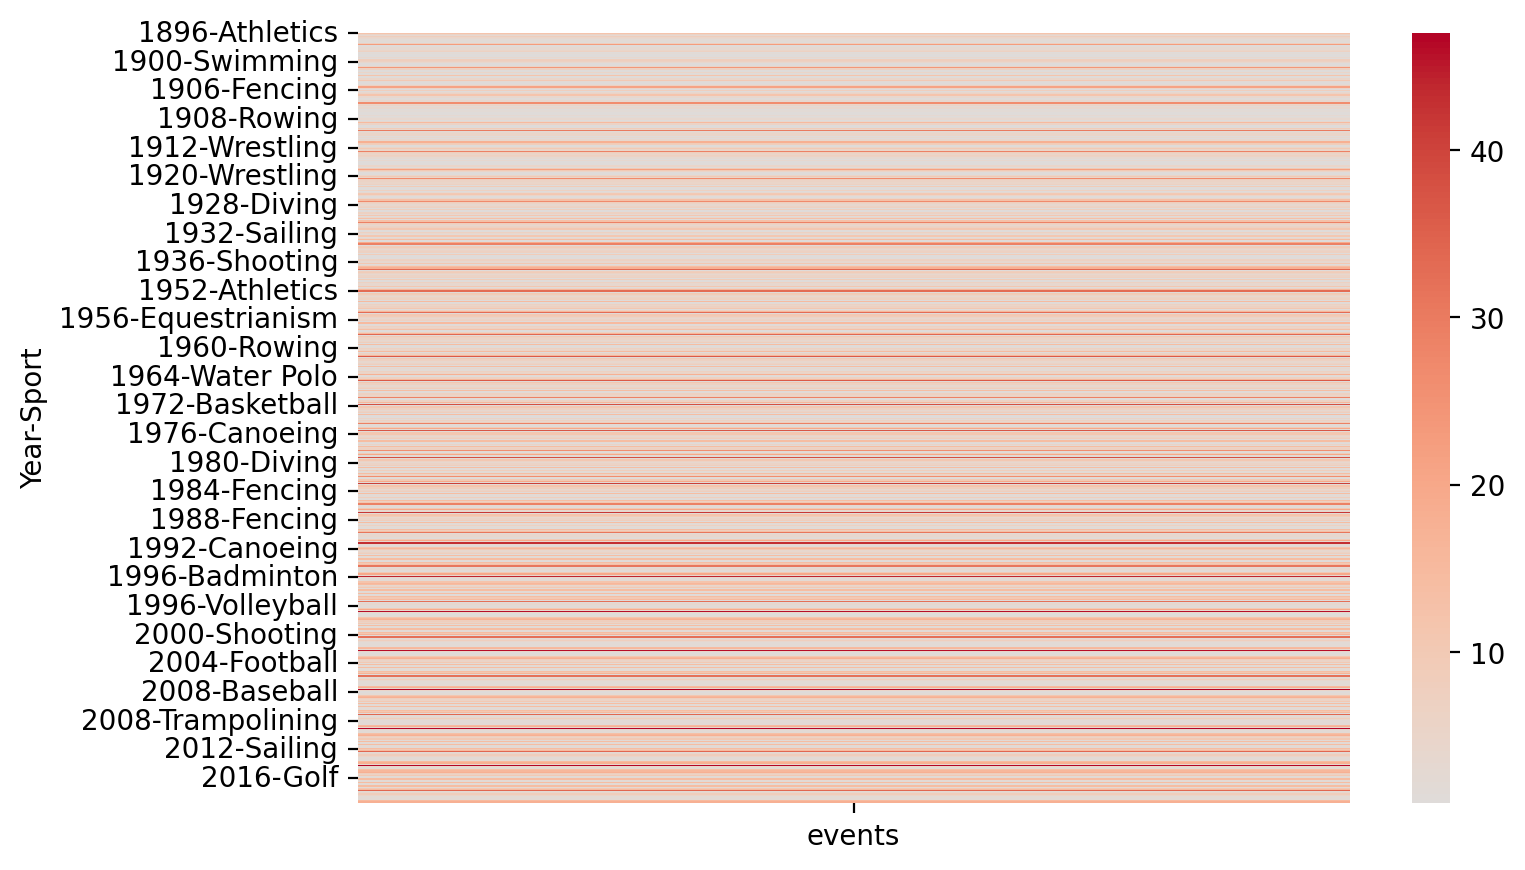

In [70]:
plt.figure(figsize=(8,5),dpi=200)
sns.heatmap(sport_events_overyears,cmap='coolwarm',center=0)

In [71]:
#2nd method to find no. of events in different sports over the years
pd.pivot_table(ath_df.drop_duplicates(subset=['Year','Event','Sport']),columns=['Year'],index='Sport',values='Event',aggfunc='count').fillna(0).astype(int)

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

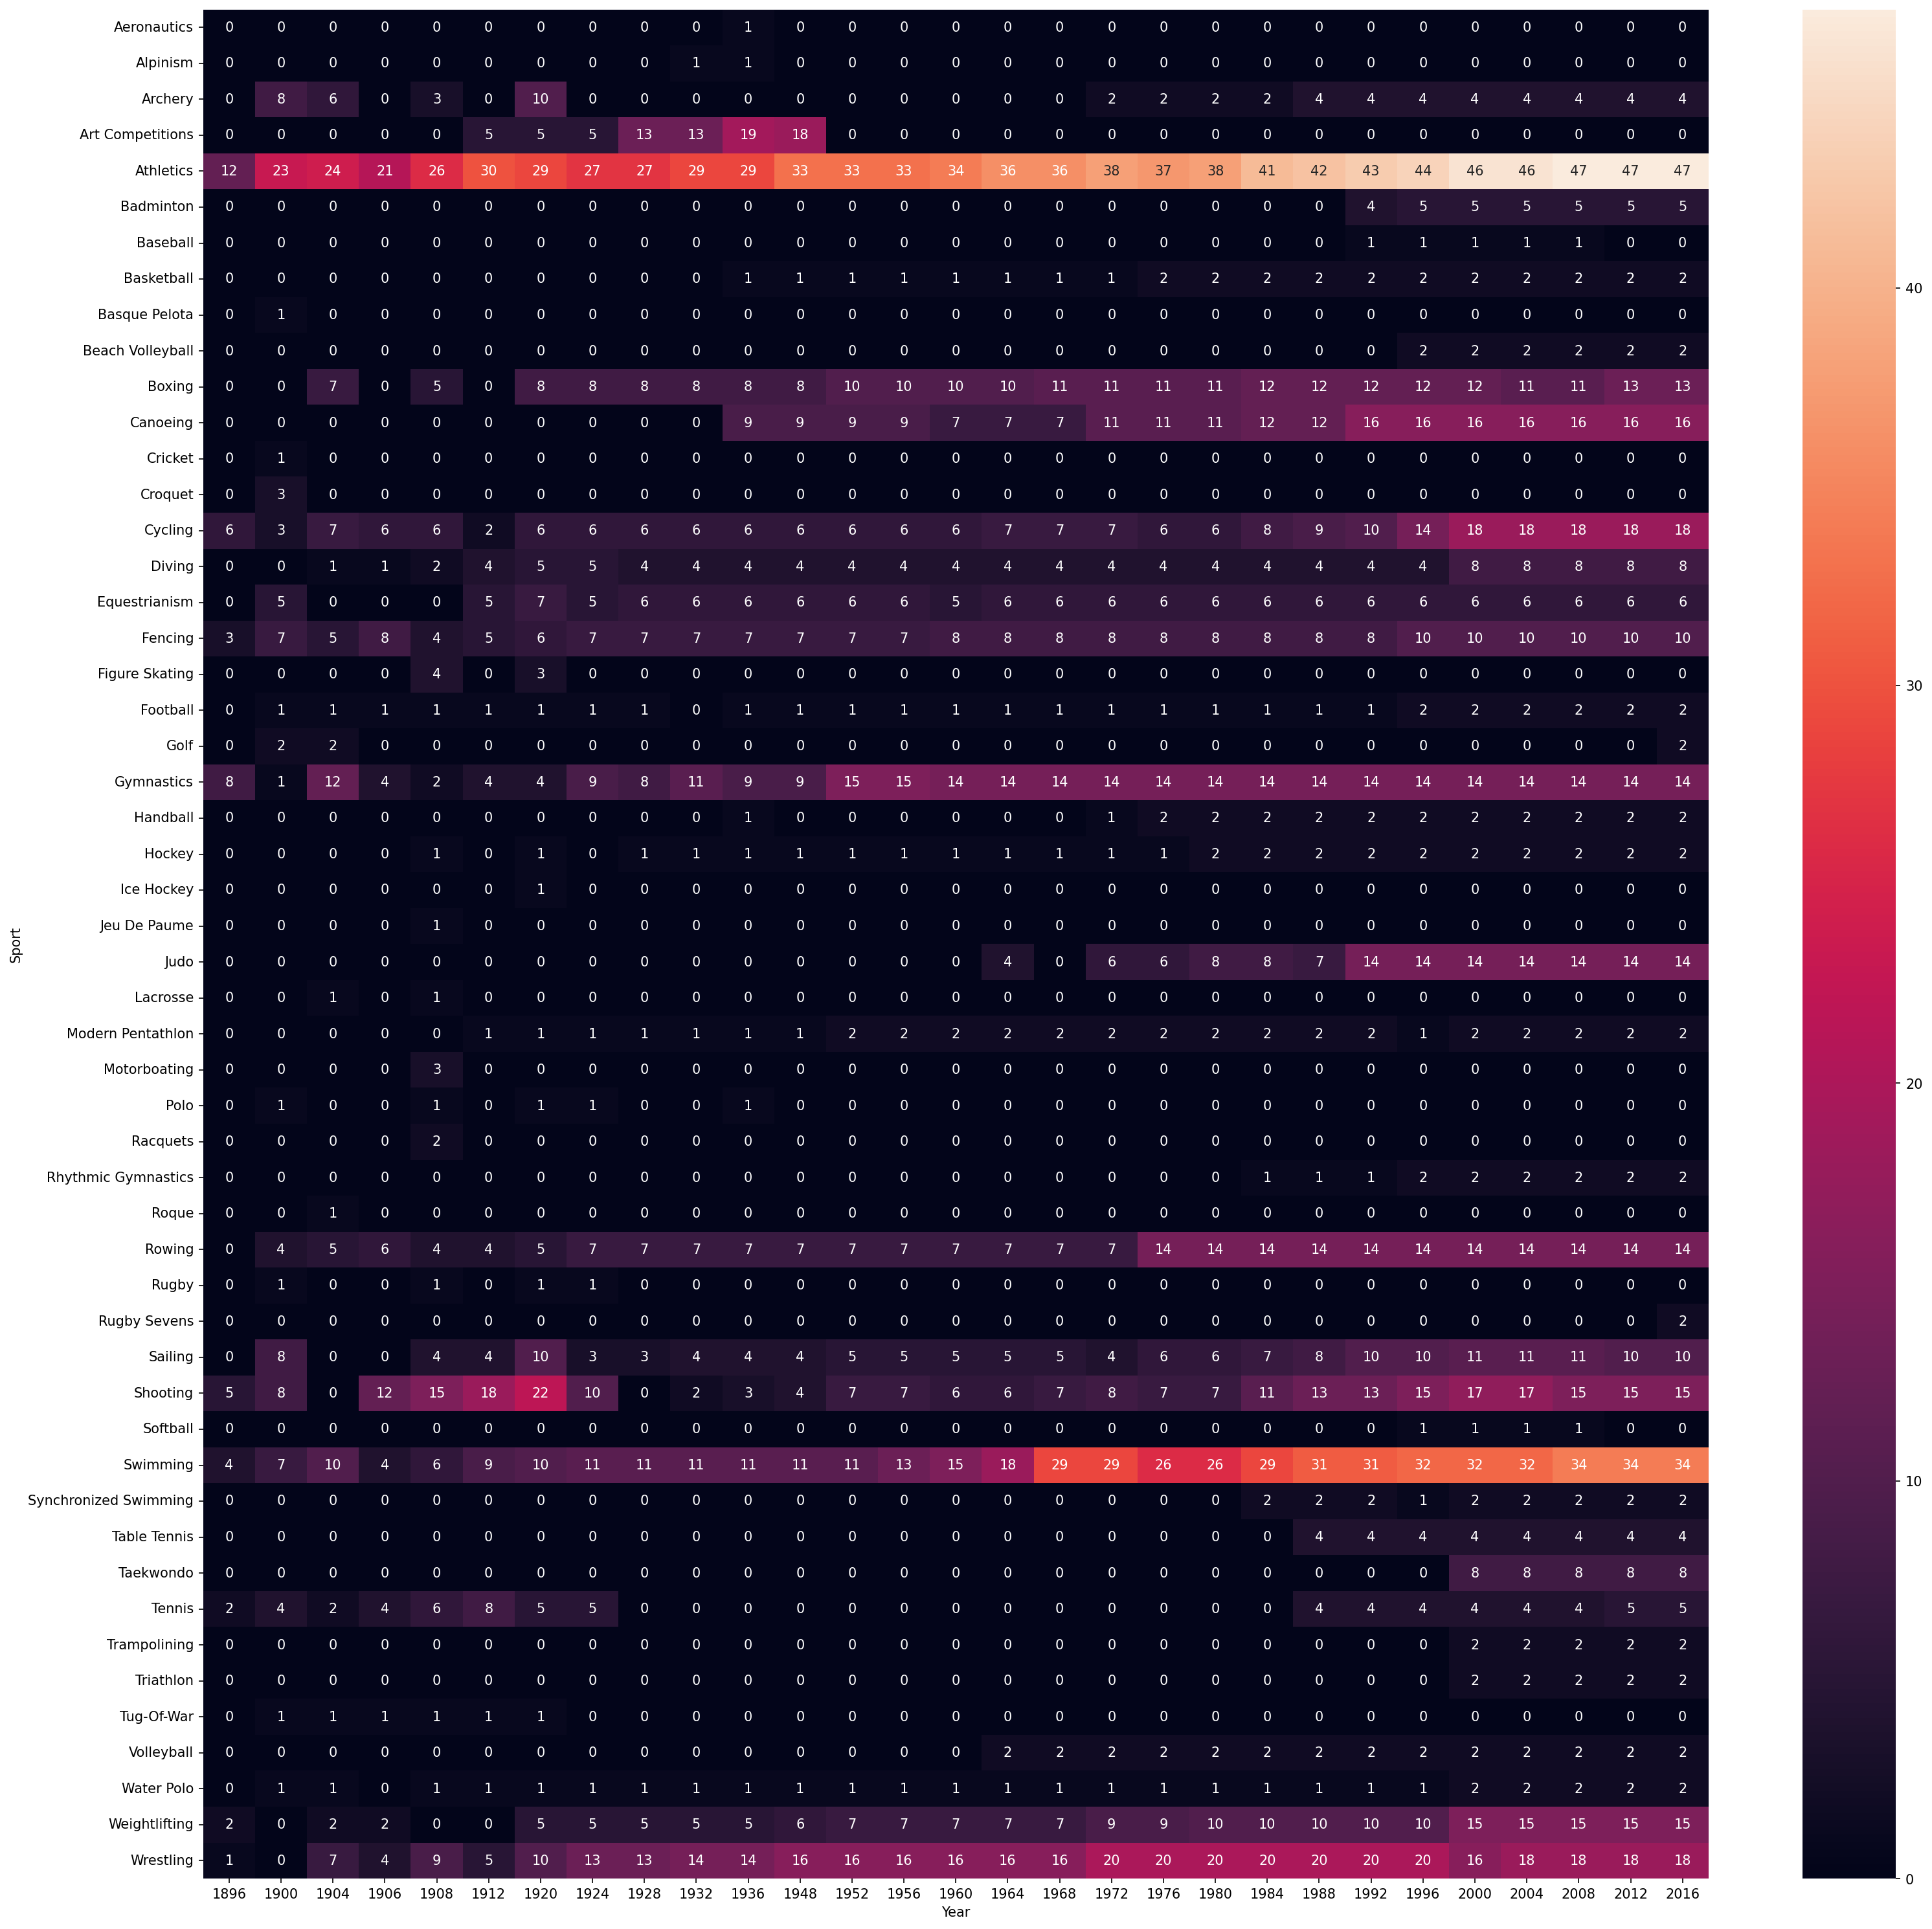

In [72]:
plt.figure(figsize=(25,25),dpi=150)
sns.heatmap(pd.pivot_table(ath_df.drop_duplicates(subset=['Year','Event','Sport']),columns=['Year'],index='Sport',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)
plt.show()

# Athelete's performance

In [73]:
op = ath_df.dropna(subset=['Medal'])

In [74]:
op[op["Name"]=='A Dijiang']

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Year, Season, City, Sport, Event, Medal, Bronze, Gold, Silver, region]
Index: []

In [75]:
ath_df[ath_df['Name']=='A Lamusi']

ID      Name Sex   Age  Height  Weight   Team  NOC  Year  Season    City  \
1   2  A Lamusi   M  23.0   170.0    60.0  China  CHN  2012  Summer  London   

  Sport                         Event Medal  Bronze  Gold  Silver region  
1  Judo  Judo Men's Extra-Lightweight   NaN       0     0       0  China

In [76]:
n_op = pd.DataFrame(op['Name'].value_counts()).reset_index()

In [77]:
n_op.rename(columns={'count':'total_medals'},inplace=True)

In [78]:
n_op

Name  total_medals
0                 Michael Fred Phelps, II            28
1      Larysa Semenivna Latynina (Diriy-)            18
2            Nikolay Yefimovich Andrianov            15
3             Borys Anfiyanovych Shakhlin            13
4                             Takashi Ono            13
...                                   ...           ...
24540                  Joel Isasi Gonzlez             1
24541             Florena Andreea Isrescu             1
24542                        Ryoji Isaoka             1
24543                     Preben Isaksson             1
24544                         rpd Lengyel             1

[24545 rows x 2 columns]

In [79]:
op.drop_duplicates('Name')[['Name','Sport','region']]

Name       Sport       region
3                      Edgar Lindenau Aabye  Tug-Of-War      Denmark
37                     Arvo Ossian Aaltonen    Swimming      Finland
41                  Paavo Johannes Aaltonen  Gymnastics      Finland
79                Ragnhild Margrethe Aamodt    Handball       Norway
86                         Alf Lied Aanning  Gymnastics       Norway
...                                     ...         ...          ...
269661                   Krzysztof Zwoliski   Athletics       Poland
269663                      Henk Jan Zwolle      Rowing  Netherlands
269691  Galina Ivanovna Zybina (-Fyodorova)   Athletics       Russia
269697                         Bogusaw Zych     Fencing       Poland
269717            Olesya Nikolayevna Zykina   Athletics       Russia

[24545 rows x 3 columns]

In [80]:
ath_perf = n_op.merge(op.drop_duplicates('Name')[['Name','Sport','region']],how='inner',on='Name')

In [81]:
ath_perf

Name  total_medals          Sport  \
0                 Michael Fred Phelps, II            28       Swimming   
1      Larysa Semenivna Latynina (Diriy-)            18     Gymnastics   
2            Nikolay Yefimovich Andrianov            15     Gymnastics   
3             Borys Anfiyanovych Shakhlin            13     Gymnastics   
4                             Takashi Ono            13     Gymnastics   
...                                   ...           ...            ...   
24540                  Joel Isasi Gonzlez             1      Athletics   
24541             Florena Andreea Isrescu             1     Gymnastics   
24542                        Ryoji Isaoka             1  Weightlifting   
24543                     Preben Isaksson             1        Cycling   
24544                         rpd Lengyel             1       Swimming   

        region  
0          USA  
1       Russia  
2       Russia  
3       Russia  
4        Japan  
...        ...  
24540     Cuba  
24541  Romania  
24542    Japan  
24543  Denmark  
24544  Hungary  

[24545 rows x 4 columns]

In [82]:
def best(spt):
    if(spt=='Overall'):
        return ath_perf
    else:
        return ath_perf[ath_perf['Sport'] == spt]

In [83]:
best('Gymnastics')

Name  total_medals       Sport   region
1      Larysa Semenivna Latynina (Diriy-)            18  Gymnastics   Russia
2            Nikolay Yefimovich Andrianov            15  Gymnastics   Russia
3             Borys Anfiyanovych Shakhlin            13  Gymnastics   Russia
4                             Takashi Ono            13  Gymnastics    Japan
7                 Aleksey Yuryevich Nemov            12  Gymnastics   Russia
...                                   ...           ...         ...      ...
24419                 Filiberto Innocenti             1  Gymnastics    Italy
24447         Valery Leonidovich Ilyinykh             1  Gymnastics   Russia
24452           Tauno Ilmoniemi (Granit-)             1  Gymnastics  Finland
24461             Larisa Andreea Iordache             1  Gymnastics  Romania
24541             Florena Andreea Isrescu             1  Gymnastics  Romania

[1308 rows x 4 columns]

# Country-Wise Analysis

In [84]:
op[['Year','Medal','region']]

Year   Medal   region
3       1900    Gold  Denmark
37      1920  Bronze  Finland
38      1920  Bronze  Finland
41      1948  Bronze  Finland
42      1948    Gold  Finland
...      ...     ...      ...
269693  1956  Silver   Russia
269695  1964  Bronze   Russia
269697  1980  Bronze   Poland
269717  2000  Bronze   Russia
269718  2004  Silver   Russia

[34077 rows x 3 columns]

In [85]:
ath_df.drop_duplicates(subset=['Sex', 'Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal']).groupby(['Year','region']).agg({'Medal':['count']})

Medal
                             count
Year region                       
1896 Australia                   3
     Austria                     5
     Denmark                     6
     France                     11
     Germany                    14
...                            ...
2016 Virgin Islands, British     0
     Virgin Islands, US          0
     Yemen                       0
     Zambia                      0
     Zimbabwe                    0

[2769 rows x 1 columns]

In [86]:
ct = ath_df.drop_duplicates(subset=['Sex', 'Team', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [87]:
ct.dropna(subset=['Medal'],inplace=True)

C:\Users\sujal\AppData\Local\Temp\ipykernel_26912\3340271357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct.dropna(subset=['Medal'],inplace=True)


In [88]:
cm = pd.DataFrame(ct[ct['region']=='India']['Year'].value_counts()).sort_values(by='Year')

In [89]:
cm.reset_index(inplace=True)

In [90]:
def c_mtally(country):
    cm = pd.DataFrame(ct[ct['region']==country]['Year'].value_counts()).sort_values(by='Year')
    cm.reset_index(inplace=True)
    print(cm)
    plt.plot(cm['Year'],cm['count'],marker='o')
    plt.xlabel('year')
    plt.ylabel('Medals')

    Year  count
0   1896     11
1   1900    109
2   1904      2
3   1906     42
4   1908     19
5   1912     16
6   1920     43
7   1924     40
8   1928     26
9   1932     20
10  1936     19
11  1948     32
12  1952     18
13  1956     14
14  1960      5
15  1964     16
16  1968     16
17  1972     13
18  1976      9
19  1980     14
20  1984     28
21  1988     16
22  1992     29
23  1996     37
24  2000     38
25  2004     33
26  2008     41
27  2012     35
28  2016     43


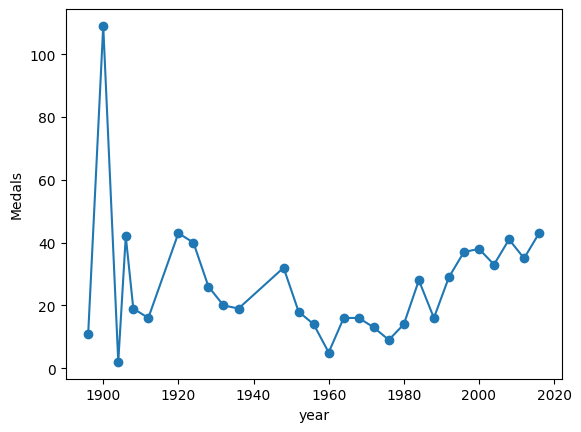

In [91]:
c_mtally('France')

In [92]:
ct[ct['region']=='India']['Sport'].value_counts()

Sport
Hockey           11
Wrestling         5
Shooting          4
Boxing            2
Badminton         2
Athletics         2
Weightlifting     1
Tennis            1
Name: count, dtype: int64

In [93]:
pd.pivot_table(ct[ct['region']=='India'],index='Sport',columns=['Year'],values='Medal',aggfunc='count').fillna(0).astype(int)

Year           1900  1928  1932  1936  1948  1952  1956  1960  1964  1968  \
Sport                                                                       
Athletics         2     0     0     0     0     0     0     0     0     0   
Badminton         0     0     0     0     0     0     0     0     0     0   
Boxing            0     0     0     0     0     0     0     0     0     0   
Hockey            0     1     1     1     1     1     1     1     1     1   
Shooting          0     0     0     0     0     0     0     0     0     0   
Tennis            0     0     0     0     0     0     0     0     0     0   
Weightlifting     0     0     0     0     0     0     0     0     0     0   
Wrestling         0     0     0     0     0     1     0     0     0     0   

Year           1972  1980  1996  2000  2004  2008  2012  2016  
Sport                                                          
Athletics         0     0     0     0     0     0     0     0  
Badminton         0     0     0     0     0     0     1     1  
Boxing            0     0     0     0     0     1     1     0  
Hockey            1     1     0     0     0     0     0     0  
Shooting          0     0     0     0     1     1     2     0  
Tennis            0     0     1     0     0     0     0     0  
Weightlifting     0     0     0     1     0     0     0     0  
Wrestling         0     0     0     0     0     1     2     1

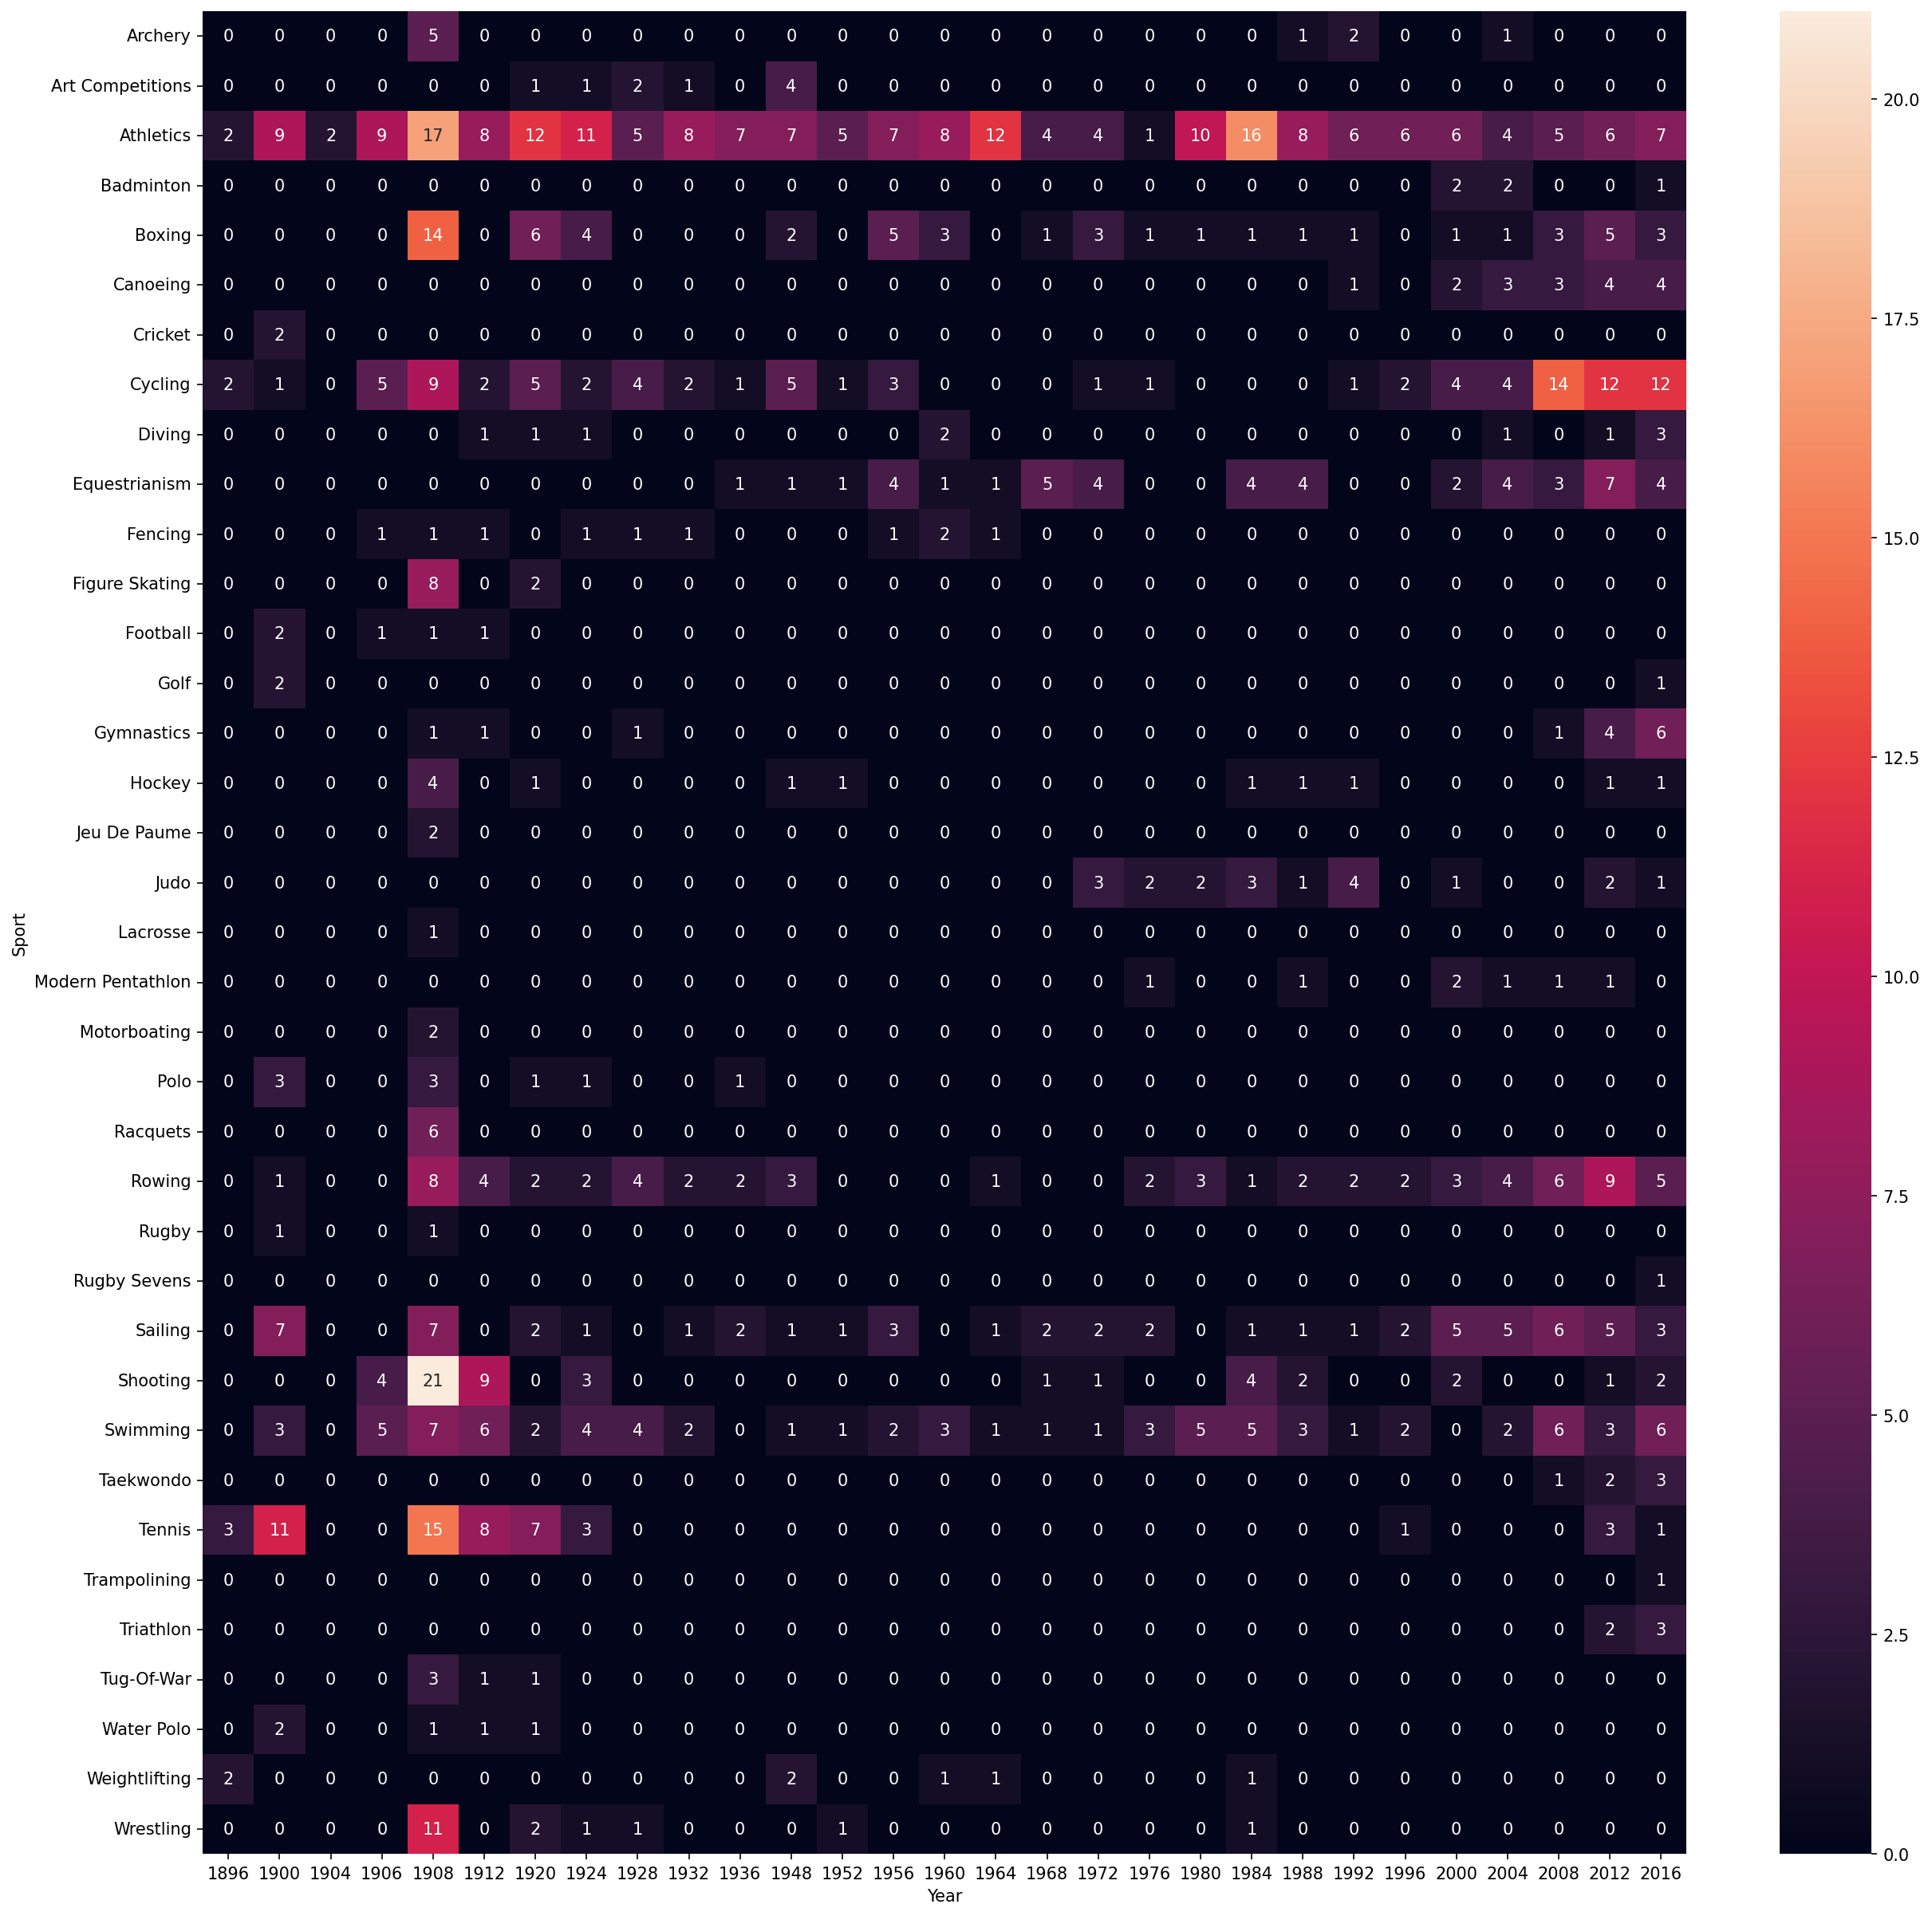

In [94]:
plt.figure(figsize=(20,20),dpi=150)
sns.heatmap(pd.pivot_table(ct[ct['region']=='UK'],index='Sport',columns=['Year'],values='Medal',aggfunc='count').fillna(0).astype(int),annot=True)
plt.yticks(rotation=0)
plt.show()

# Top Atheletes of a country

In [95]:
ath_perf[ath_perf['region']=='India'].reset_index(drop='first').head(10)

Name  total_medals   Sport region
0          Udham Singh Kular             4  Hockey  India
1     Leslie Walter Claudius             4  Hockey  India
2        Ranganathan Francis             3  Hockey  India
3  Victor John "V. J." Peter             3  Hockey  India
4           Dhyan Chand Bais             3  Hockey  India
5      Shankar Pillay Laxman             3  Hockey  India
6        Richard James Allen             3  Hockey  India
7     Harbinder Singh Chimni             3  Hockey  India
8               Balbir Singh             3  Hockey  India
9       Randhir Singh Gentle             3  Hockey  India

# Athelete_Wise analysis

In [96]:
a_df = ath_df.drop_duplicates(subset=['Name','region','Sex'])

In [97]:
a_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
269717  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
269720  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
269722  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
269723  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
269725  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC  Year  Season            City       Sport  \
0                China  CHN  1992  Summer       Barcelona  Basketball   
1                China  CHN  2012  Summer          London        Judo   
2              Denmark  DEN  1920  Summer       Antwerpen    Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris  Tug-Of-War   
26         Netherlands  NED  1932  Summer     Los Angeles   Athletics   
...                ...  ...   ...     ...             ...         ...   
269717          Russia  RUS  2000  Summer          Sydney   Athletics   
269720       Argentina  ARG  2000  Summer          Sydney      Hockey   
269722   United States  USA  1972  Summer          Munich    Football   
269723          Russia  RUS  2000  Summer          Sydney      Rowing   
269725         Belarus  BLR  2016  Summer  Rio de Janeiro  Basketball   

                                         Event   Medal  Bronze  Gold  Silver  \
0                  Basketball Men's Basketball     NaN       0     0       0   
1                 Judo Men's Extra-Lightweight     NaN       0     0       0   
2                      Football Men's Football     NaN       0     0       0   
3                  Tug-Of-War Men's Tug-Of-War    Gold       0     1       0   
26                Athletics Women's 100 metres     NaN       0     0       0   
...                                        ...     ...     ...   ...     ...   
269717  Athletics Women's 4 x 400 metres Relay  Bronze       1     0       0   
269720                     Hockey Men's Hockey     NaN       0     0       0   
269722                 Football Men's Football     NaN       0     0       0   
269723  Rowing Men's Lightweight Coxless Fours     NaN       0     0       0   
269725           Basketball Women's Basketball     NaN       0     0       0   

             region  
0             China  
1             China  
2           Denmark  
3           Denmark  
26      Netherlands  
...             ...  
269717       Russia  
269720    Argentina  
269722          USA  
269723       Russia  
269725      Belarus  

[116932 rows x 18 columns]

In [98]:
data1 = a_df['Age'].dropna().tolist()
data2 = a_df[a_df['Medal']=='Gold']['Age'].dropna().tolist()
data3 = a_df[a_df['Medal']=='Silver']['Age'].dropna().tolist()
data4 = a_df[a_df['Medal']=='Bronze']['Age'].dropna().tolist()

In [99]:
#pip install plotly

In [100]:
import plotly.figure_factory as ff

In [101]:
fig = ff.create_distplot([data1,data2,data3,data4],['Overall Age','Gold','Silver','Bronze'],show_hist=False,show_rug=False)
fig.show()

In [102]:
sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [103]:
sports

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Polo',
 'Ice Hockey']

In [104]:
s_age = []
s_name = []
for sport in sports:
    s_df = a_df[a_df['Sport'] == sport]
    s_age.append(s_df[s_df['Medal']=='Gold']['Age'].dropna().tolist())
    s_name.append(sport)

In [105]:
fig1 = ff.create_distplot(s_age,s_name,show_hist=False,show_rug=False)
fig1.show()

In [106]:
a_df['Medal'].fillna('None',inplace=True)

In [107]:
a_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
269717  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
269720  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
269722  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
269723  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
269725  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC  Year  Season            City       Sport  \
0                China  CHN  1992  Summer       Barcelona  Basketball   
1                China  CHN  2012  Summer          London        Judo   
2              Denmark  DEN  1920  Summer       Antwerpen    Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris  Tug-Of-War   
26         Netherlands  NED  1932  Summer     Los Angeles   Athletics   
...                ...  ...   ...     ...             ...         ...   
269717          Russia  RUS  2000  Summer          Sydney   Athletics   
269720       Argentina  ARG  2000  Summer          Sydney      Hockey   
269722   United States  USA  1972  Summer          Munich    Football   
269723          Russia  RUS  2000  Summer          Sydney      Rowing   
269725         Belarus  BLR  2016  Summer  Rio de Janeiro  Basketball   

                                         Event   Medal  Bronze  Gold  Silver  \
0                  Basketball Men's Basketball    None       0     0       0   
1                 Judo Men's Extra-Lightweight    None       0     0       0   
2                      Football Men's Football    None       0     0       0   
3                  Tug-Of-War Men's Tug-Of-War    Gold       0     1       0   
26                Athletics Women's 100 metres    None       0     0       0   
...                                        ...     ...     ...   ...     ...   
269717  Athletics Women's 4 x 400 metres Relay  Bronze       1     0       0   
269720                     Hockey Men's Hockey    None       0     0       0   
269722                 Football Men's Football    None       0     0       0   
269723  Rowing Men's Lightweight Coxless Fours    None       0     0       0   
269725           Basketball Women's Basketball    None       0     0       0   

             region  
0             China  
1             China  
2           Denmark  
3           Denmark  
26      Netherlands  
...             ...  
269717       Russia  
269720    Argentina  
269722          USA  
269723       Russia  
269725      Belarus  

[116932 rows x 18 columns]

In [108]:
def plot_hw_sport():
    hw_df = a_df[a_df['Sport'] == 'Athletics']
    plt.figure(figsize=(10,10),dpi=200)
    plt.title('Height vs Weight in Athletics')
    sns.scatterplot(x=hw_df['Weight'],y=hw_df['Height'],hue=hw_df['Medal'],style=hw_df['Sex'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

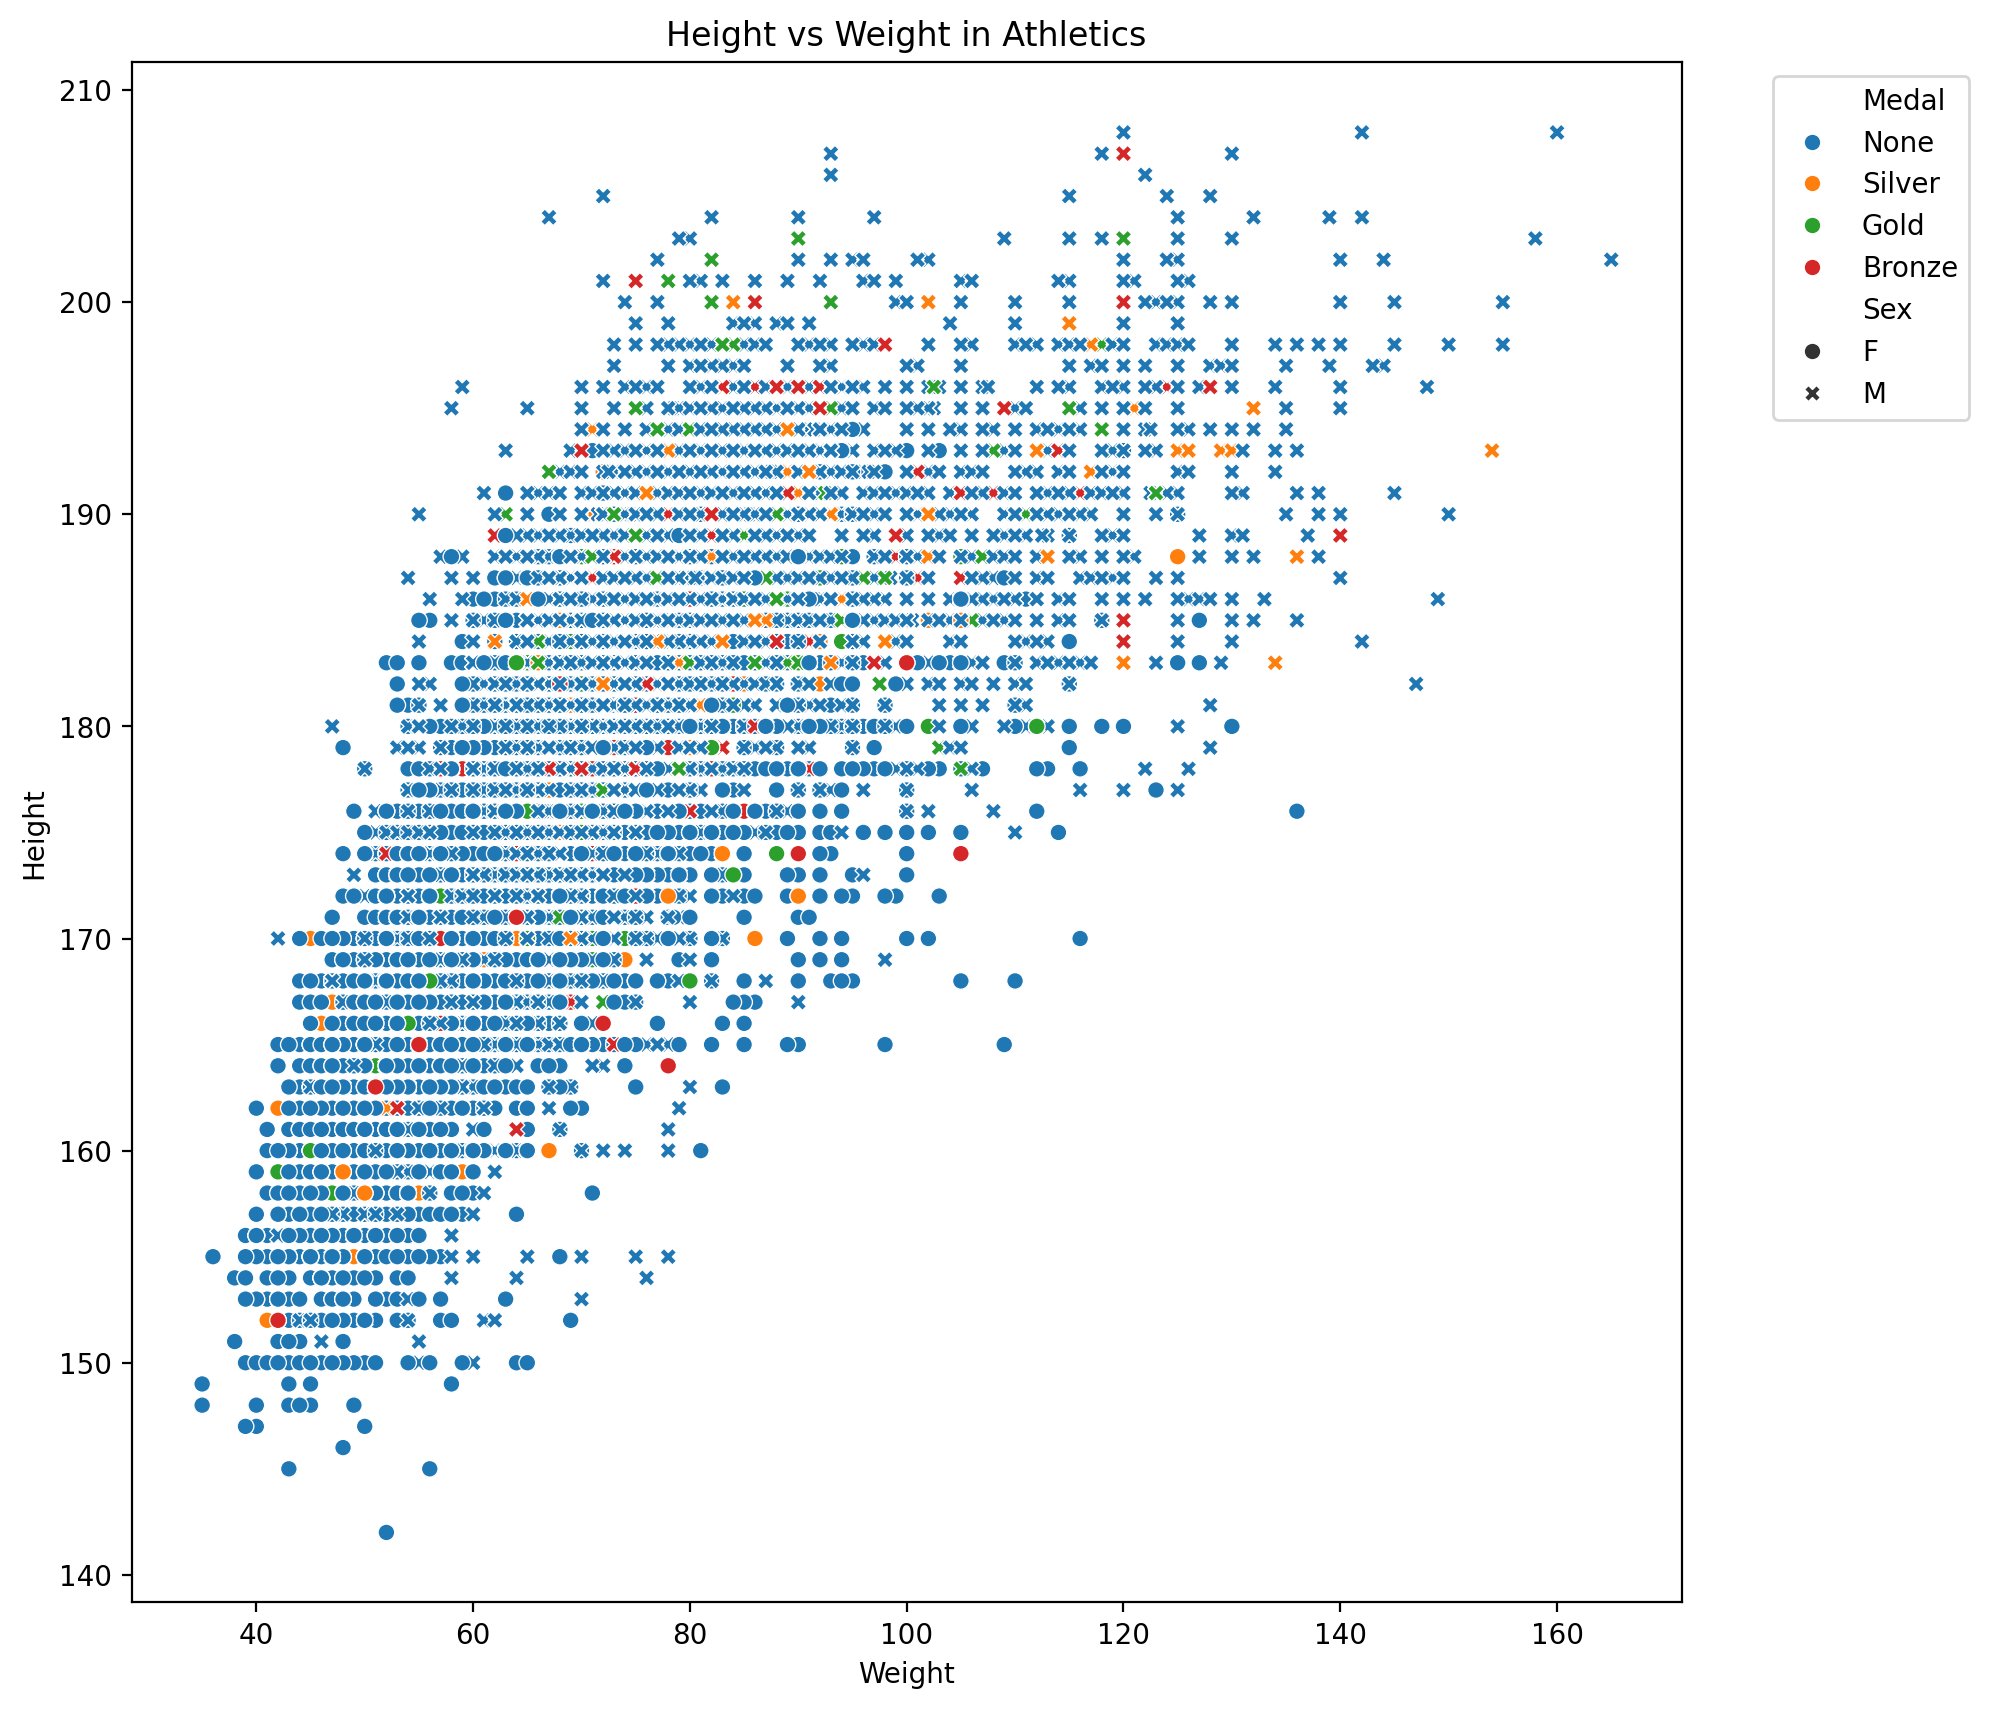

In [109]:
plot_hw_sport()

In [131]:
a_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
269717  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
269720  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
269722  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
269723  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
269725  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC  Year  Season            City       Sport  \
0                China  CHN  1992  Summer       Barcelona  Basketball   
1                China  CHN  2012  Summer          London        Judo   
2              Denmark  DEN  1920  Summer       Antwerpen    Football   
3       Denmark/Sweden  DEN  1900  Summer           Paris  Tug-Of-War   
26         Netherlands  NED  1932  Summer     Los Angeles   Athletics   
...                ...  ...   ...     ...             ...         ...   
269717          Russia  RUS  2000  Summer          Sydney   Athletics   
269720       Argentina  ARG  2000  Summer          Sydney      Hockey   
269722   United States  USA  1972  Summer          Munich    Football   
269723          Russia  RUS  2000  Summer          Sydney      Rowing   
269725         Belarus  BLR  2016  Summer  Rio de Janeiro  Basketball   

                                         Event   Medal  Bronze  Gold  Silver  \
0                  Basketball Men's Basketball    None       0     0       0   
1                 Judo Men's Extra-Lightweight    None       0     0       0   
2                      Football Men's Football    None       0     0       0   
3                  Tug-Of-War Men's Tug-Of-War    Gold       0     1       0   
26                Athletics Women's 100 metres    None       0     0       0   
...                                        ...     ...     ...   ...     ...   
269717  Athletics Women's 4 x 400 metres Relay  Bronze       1     0       0   
269720                     Hockey Men's Hockey    None       0     0       0   
269722                 Football Men's Football    None       0     0       0   
269723  Rowing Men's Lightweight Coxless Fours    None       0     0       0   
269725           Basketball Women's Basketball    None       0     0       0   

             region  
0             China  
1             China  
2           Denmark  
3           Denmark  
26      Netherlands  
...             ...  
269717       Russia  
269720    Argentina  
269722          USA  
269723       Russia  
269725      Belarus  

[116932 rows x 18 columns]

In [138]:
mf_df = a_df[['Year','Sex']].groupby(['Year','Sex']).size().reset_index()

In [139]:
mf_df.columns

Index(['Year', 'Sex', 0], dtype='object')

In [141]:
mf_df.rename(columns={0:'count'},inplace=True)

In [156]:
mf_df

Year Sex  count
0   1896   M    174
1   1900   F     23
2   1900   M   1181
3   1904   F      6
4   1904   M    629
5   1906   F      6
6   1906   M    759
7   1908   F     44
8   1908   M   1772
9   1912   F     53
10  1912   M   1978
11  1920   F     73
12  1920   M   2280
13  1924   F    132
14  1924   M   2535
15  1928   F    285
16  1928   M   2342
17  1932   F    162
18  1932   M   1382
19  1936   F    316
20  1936   M   3539
21  1948   F    420
22  1948   M   3629
23  1952   F    409
24  1952   M   3468
25  1956   F    288
26  1956   M   2193
27  1960   F    473
28  1960   M   3755
29  1964   F    507
30  1964   M   3291
31  1968   F    599
32  1968   M   3555
33  1972   F    818
34  1972   M   4552
35  1976   F   1028
36  1976   M   3320
37  1980   F    875
38  1980   M   3151
39  1984   F   1368
40  1984   M   4300
41  1988   F   1737
42  1988   M   4707
43  1992   F   2082
44  1992   M   4770
45  1996   F   2522
46  1996   M   4814
47  2000   F   2793
48  2000   M   4298
49  2004   F   2823
50  2004   M   3933
51  2008   F   2950
52  2008   M   3998
53  2012   F   2922
54  2012   M   3679
55  2016   F   3211
56  2016   M   4023

In [144]:
a_df[(a_df['Year']==1900) & (a_df['Sex']=='F')]['Sex'].value_counts()

Sex
F    23
Name: count, dtype: int64

In [145]:
import plotly.express as px

In [155]:
fig2 = px.line(mf_df, x="Year", y="count",color='Sex')
fig2.show()